# Import libraries

In [167]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Functions

In [168]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

In [169]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'dataset/df_ecom_pre_proc.csv'

file_tag = 'df_ecom_pre_proc'

# Load

In [ ]:
## Get sample from dataset 

In [170]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

# Display the first 100 rows of the DataFrame


df.head(20)


,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,view,NaN,26.26,apparel,underwear,NaN,not_purchase,4,weekday,Thursday,23,10,28,morning
1,view,xiaomi,386.08,appliances,personal,massager,not_purchase,5,weekday,Thursday,30,6,43,morning
2,view,ariston,123.53,electronics,clocks,NaN,not_purchase,3,weekday,Friday,17,16,7,afternoon
3,view,kawai,1437.53,apparel,underwear,NaN,not_purchase,4,weekday,Thursday,23,11,34,morning
4,view,defacto,17.99,apparel,shoes,keds,not_purchase,3,weekday,Tuesday,21,4,25,night
5,cart,samsung,195.87,construction,tools,light,not_purchase,1,weekday,Thursday,2,11,46,morning
6,view,asus,385.57,electronics,audio,headphone,not_purchase,4,weekday,Thursday,23,14,26,afternoon
7,view,galaxy,48.73,appliances,kitchen,oven,not_purchase,3,weekday,Thursday,16,13,8,afternoon
8,view,vivo,141.55,construction,tools,light,not_purchase,3,weekday,Wednesday,15,12,18,afternoon
9,view,redmond,21.85,sport,bicycle,NaN,not_purchase,4,weekday,Tuesday,28,8,18,morning


# Data Profiling

## Dimensionality

### Number of records and variables

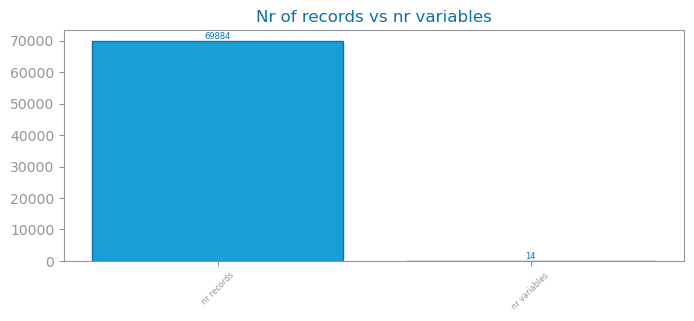

In [171]:
from matplotlib.pyplot import figure, savefig, show


figure(figsize=(8, 3)) #(largura,altura) 

values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}

#df_shape[0] - retorna o numero de linhas
#df_shape[1] - retorna o numero de colunas


plot_bar_chart(
    list(values.keys())\
    ,list(values.values())\
    ,title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

### Missing values

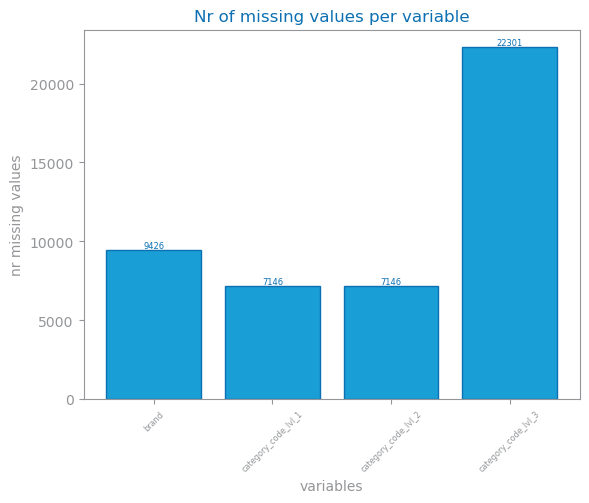

In [172]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69884 entries, 0 to 69883
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_type           69884 non-null  object 
 1   brand                60458 non-null  object 
 2   price                69884 non-null  float64
 3   category_code_lvl_1  62738 non-null  object 
 4   category_code_lvl_2  62738 non-null  object 
 5   category_code_lvl_3  47583 non-null  object 
 6   conversion           69884 non-null  object 
 7   week_of_month        69884 non-null  int64  
 8   is_weekend           69884 non-null  object 
 9   day_of_week          69884 non-null  object 
 10  day                  69884 non-null  int64  
 11  hour                 69884 non-null  int64  
 12  min                  69884 non-null  int64  
 13  time_of_day          69884 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 7.5+ MB


### Variables Type

In [174]:
df.dtypes

event_type              object
brand                   object
price                  float64
category_code_lvl_1     object
category_code_lvl_2     object
category_code_lvl_3     object
conversion              object
week_of_month            int64
is_weekend              object
day_of_week             object
day                      int64
hour                     int64
min                      int64
time_of_day             object
dtype: object

In [175]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['price', 'week_of_month', 'day', 'hour', 'min'], 'binary': ['conversion', 'is_weekend'], 'date': [], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'day_of_week', 'time_of_day']}


#### Change symbolic columns type, to category (instead of object)

In [176]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

event_type             category
brand                  category
price                   float64
category_code_lvl_1    category
category_code_lvl_2    category
category_code_lvl_3    category
conversion               object
week_of_month             int64
is_weekend               object
day_of_week            category
day                       int64
hour                      int64
min                       int64
time_of_day            category
dtype: object

## Distribuition

In [177]:

summary5: df = df.describe(include="all")
summary5

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
count,69884,60458,69884.000000,62738,62738,47583,69884,69884.000000,69884,69884,69884.000000,69884.000000,69884.000000,69884
unique,3,2044,NaN,13,58,84,2,NaN,2,7,NaN,NaN,NaN,3
top,view,samsung,NaN,construction,tools,light,not_purchase,NaN,weekday,Thursday,NaN,NaN,NaN,afternoon
freq,65038,8429,NaN,17835,17475,15272,68443,NaN,51074,11985,NaN,NaN,NaN,28094
mean,NaN,NaN,273.017533,NaN,NaN,NaN,NaN,2.900077,NaN,NaN,17.094700,11.498569,29.530450,NaN
std,NaN,NaN,353.039316,NaN,NaN,NaN,NaN,1.209855,NaN,NaN,8.347945,5.383206,17.317607,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN
25%,NaN,NaN,51.480000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,11.000000,7.000000,15.000000,NaN
50%,NaN,NaN,149.040000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,18.000000,12.000000,29.000000,NaN
75%,NaN,NaN,343.980000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,24.000000,16.000000,44.000000,NaN


In [32]:
var: str = "price"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tMean: ", summary5[var]["mean"])
print("\tStDev: ", summary5[var]["std"])
print("\tMin: ", summary5[var]["min"])
print("\tQ1: ", summary5[var]["25%"])
print("\tMedian: ", summary5[var]["50%"])
print("\tQ3: ", summary5[var]["75%"])
print("\tMax: ", summary5[var]["max"])

Summary for price variable:
	Count:  66143.0
	Mean:  270.9040326262794
	StDev:  351.0935555976244
	Min:  0.0
	Q1:  51.46
	Median:  148.93
	Q3:  339.52
	Max:  2574.07


In [33]:
var = "category_code_lvl_1"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tUnique: ", summary5[var]["unique"])
print("\tTop: ", summary5[var]["top"])
print("\tFreq: ", summary5[var]["freq"])


Summary for category_code_lvl_1 variable:
	Count:  59578
	Unique:  13
	Top:  construction
	Freq:  17581


In [41]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['price'], 'binary': ['conversion'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3']}


### Numeric Values

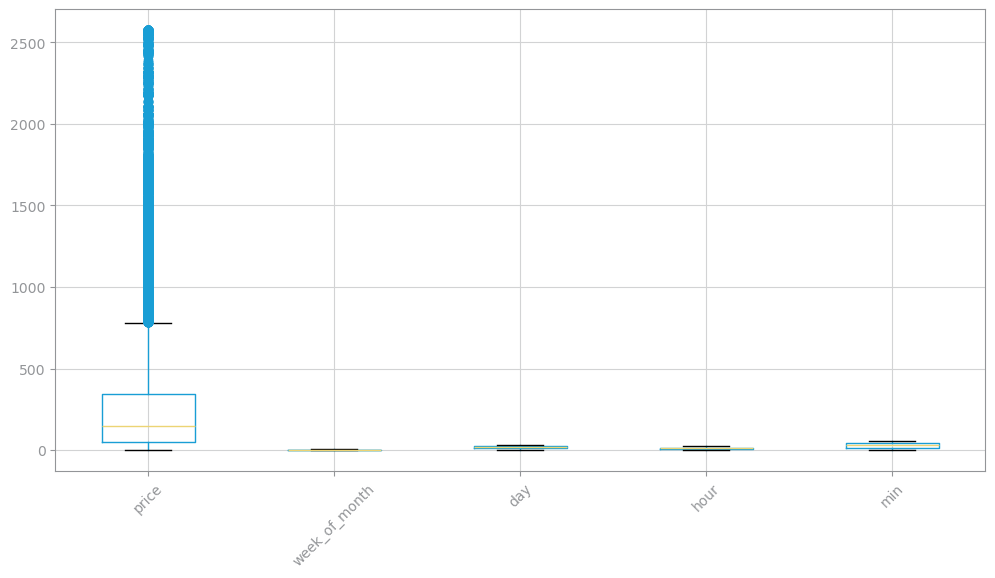

In [178]:
from matplotlib.pyplot import savefig, show

variables_types_numeric: dict[str, list] = get_variable_types(df)

numeric: list[str] = variables_types_numeric["numeric"]
if [] != numeric: #verifica que a lista numeric não está vazia ([]). Se não estiver executa o codigo em baixo
    plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
    df[numeric].boxplot(rot=45)

    #savefig(f"images/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

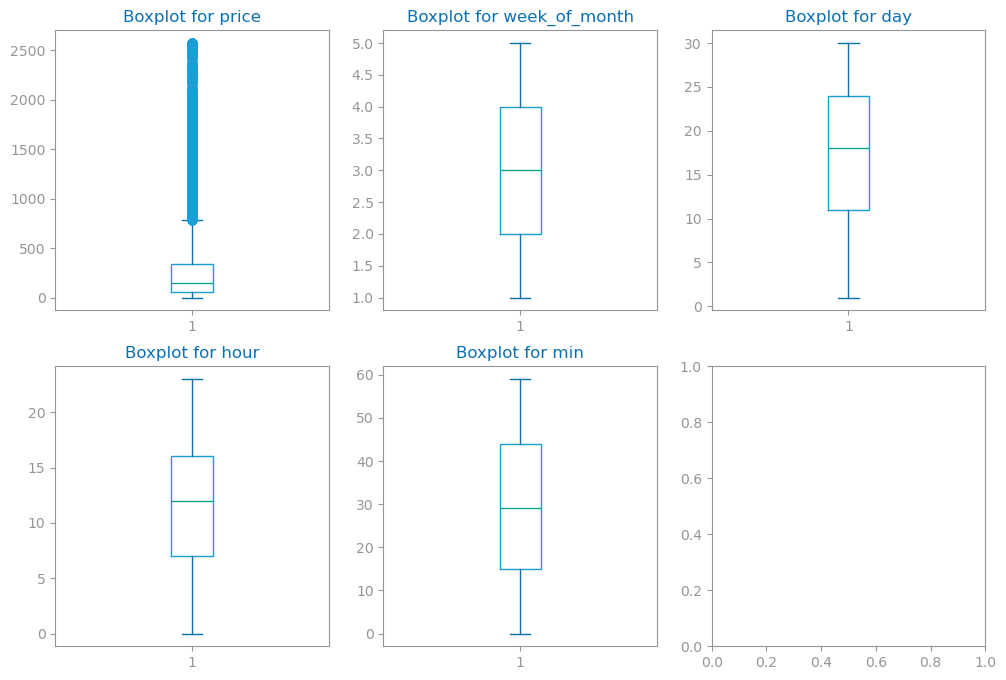

In [179]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")


In [ ]:
##Get insights

### Checking outliers

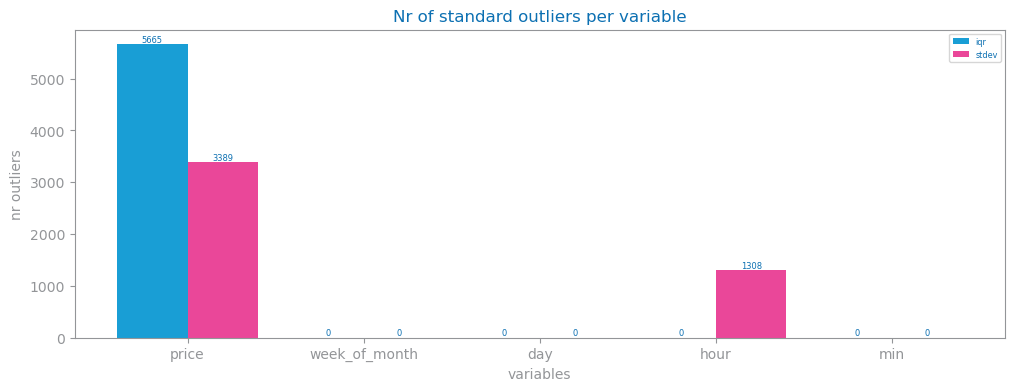

In [180]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

#This is the number of times * Standartdeviation.  
#Outliers are defined as values that are a certain distance from the mean, determined by the number of standard deviations you specified
#the higher the nr_stdev_ less outliers ww will have
NR_STDEV: int = 2


IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom



def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    #savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

### histogram for distribuition

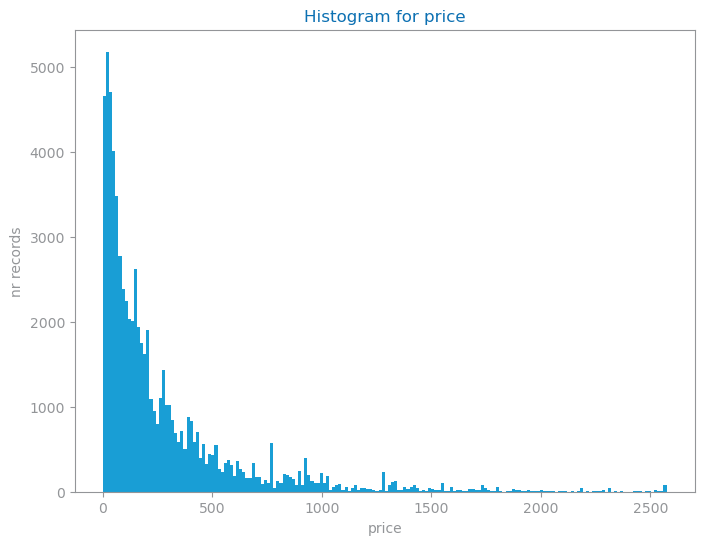

In [181]:
from dslabs_functions import set_chart_labels
import matplotlib.pyplot as plt

# Certificar-se de que a coluna 'price' está em formato numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verificar se a coluna 'price' existe no DataFrame e se é numérica
if 'price' in df.columns and df['price'].dtype in ['float64', 'int64']:
    fig, ax = plt.subplots(figsize=(8, 6))  # Tamanho do gráfico

    # Definir os rótulos do gráfico
    set_chart_labels(
        ax,
        title="Histogram for price",
        xlabel="price",
        ylabel="nr records"
    )
    
    # Gerar o histograma para a coluna 'price'
    ax.hist(df['price'].dropna().values, bins='auto')
    
    # Exibir o gráfico
    plt.show()
else:
    print("A coluna 'price' não está disponível ou não é numérica.")

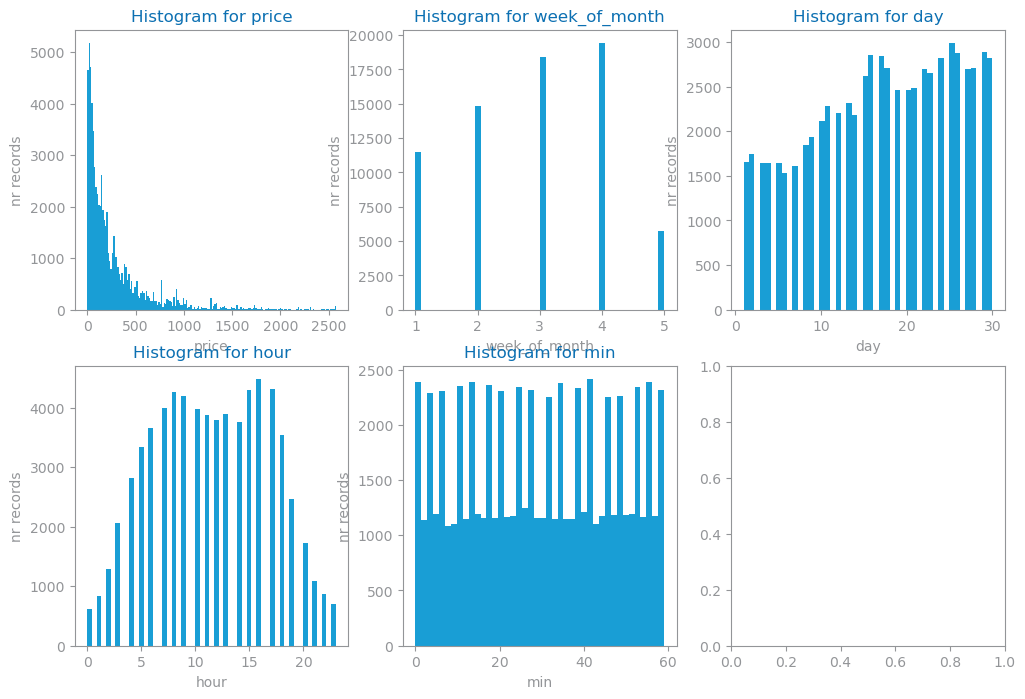

In [182]:
from dslabs_functions import set_chart_labels


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

### Symbolic variables

#### Histogram for distribuition of variables

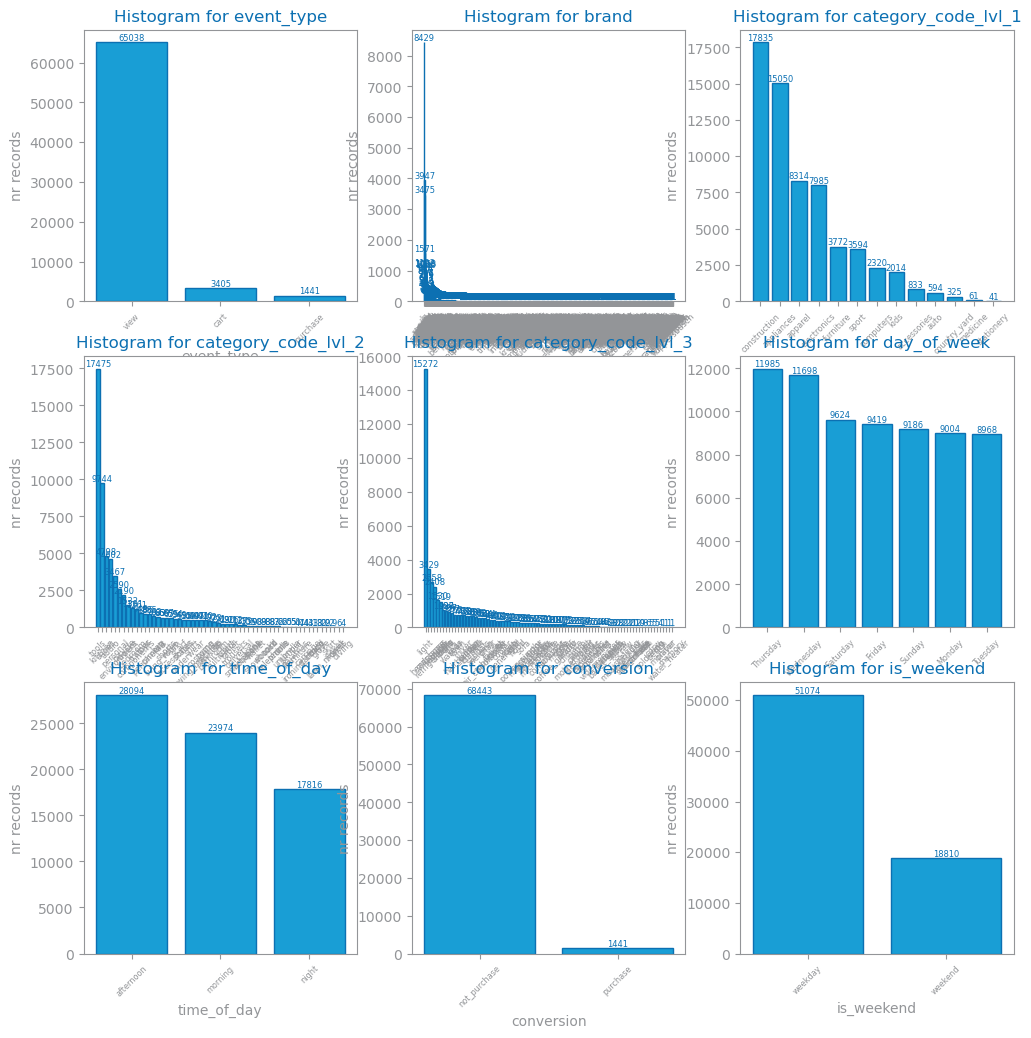

In [183]:
from dslabs_functions import plot_bar_chart

variables_types: dict[str, list] = get_variable_types(df)

symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = df[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

In [116]:
# Verifica se a coluna 'event_time' é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Cria uma nova coluna para armazenar a data sem a hora
   

    # Conta o número de dias únicos
    num_unique_days = df['day'].nunique()

    print(f"Número de dias únicos no dataset: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

Número de dias únicos no dataset: 30


##### var Brand ?? To many values

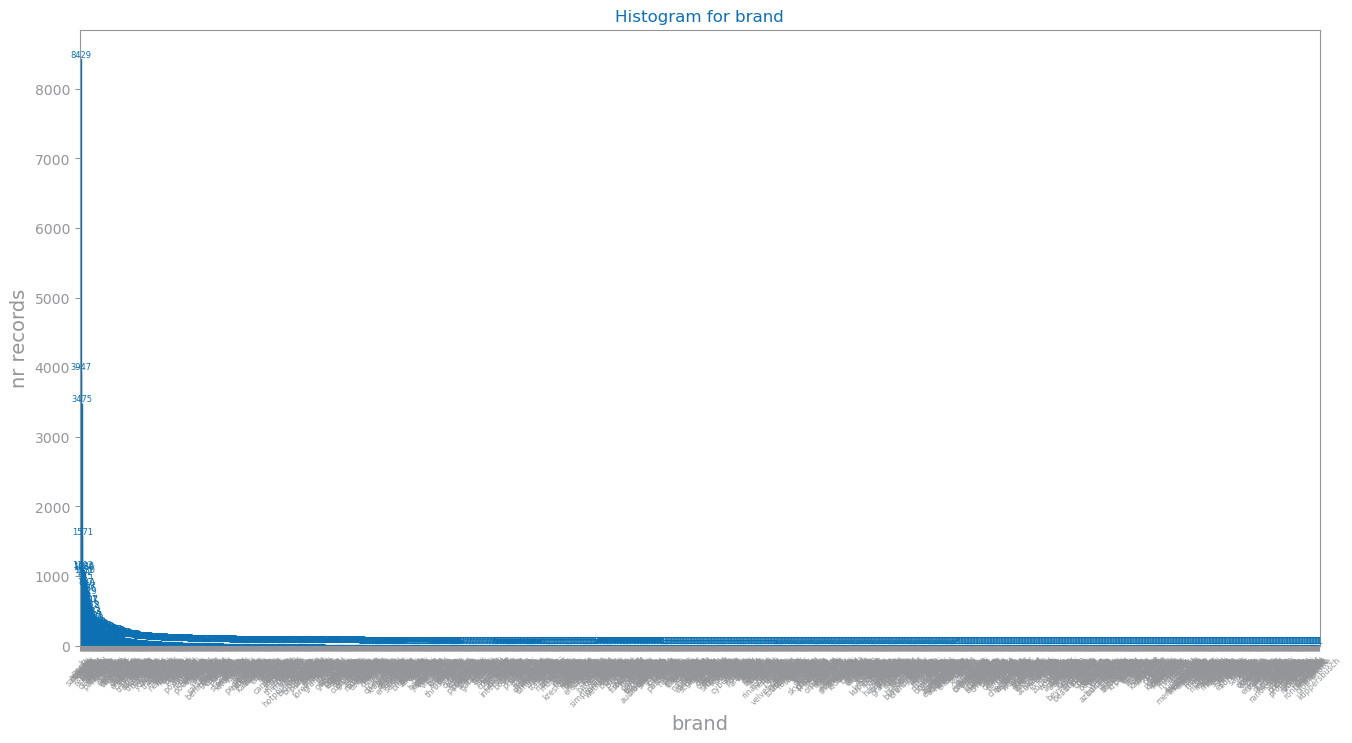

In [184]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show
from pandas import Series

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'brand'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'brand' existe na lista de variáveis simbólicas
if "brand" in symbolic:
    counts: Series = df["brand"].value_counts()  # Conta os valores para a variável

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(16, 8), squeeze=False)  # Aumentar o tamanho do gráfico

    # Plota o histograma para 'brand'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for brand",
        xlabel="brand",
        ylabel="nr records",
        percentage=False,
    )

    # Rotaciona os rótulos do eixo x para melhor legibilidade
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotacionar os rótulos

    # Ajustar o tamanho da fonte
    axs[0, 0].set_xlabel("brand", fontsize=14)  # Aumentar tamanho da fonte
    axs[0, 0].set_ylabel("nr records", fontsize=14)

    # Ajustar limites do eixo x, se necessário, para mostrar todos os bins
    axs[0, 0].set_xlim(-1, len(counts.index))  # Ajuste baseado no número de categorias

    # Exibe o gráfico
    show()
else:
    print("A variável 'brand' não existe entre as variáveis simbólicas.")


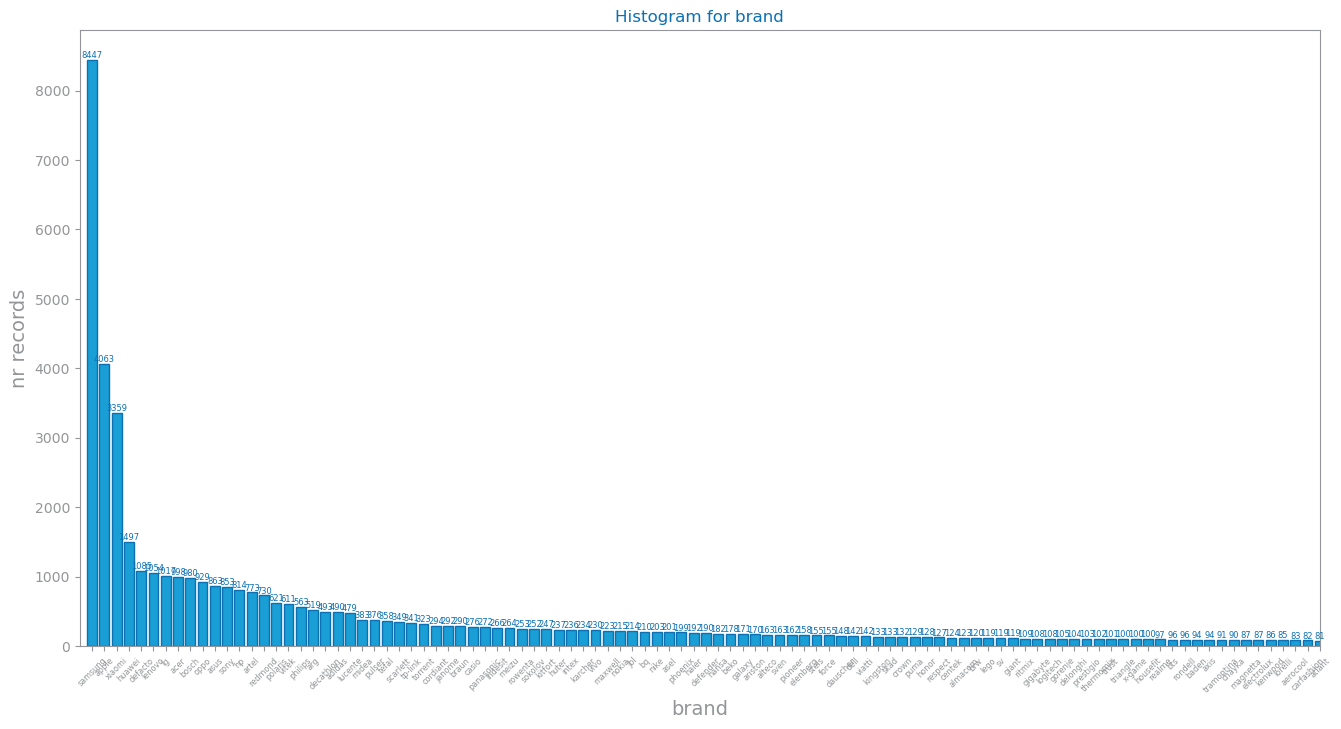

In [163]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show
from pandas import Series

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'brand'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'brand' existe na lista de variáveis simbólicas
if "brand" in symbolic:
    counts: Series = df["brand"].value_counts()  # Conta os valores para a variável

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(16, 8), squeeze=False)  # Aumentar o tamanho do gráfico

    # Plota o histograma para 'brand'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for brand",
        xlabel="brand",
        ylabel="nr records",
        percentage=False,
    )

    # Rotaciona os rótulos do eixo x para melhor legibilidade
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotacionar os rótulos

    # Ajustar o tamanho da fonte
    axs[0, 0].set_xlabel("brand", fontsize=14)  # Aumentar tamanho da fonte
    axs[0, 0].set_ylabel("nr records", fontsize=14)

    # Ajustar limites do eixo x, se necessário, para mostrar todos os bins
    axs[0, 0].set_xlim(-1, 100)  # Ajuste baseado no número de categorias

    # Exibe o gráfico
    show()
else:
    print("A variável 'brand' não existe entre as variáveis simbólicas.")

##### var category_code_lvl_1  ?? To many values

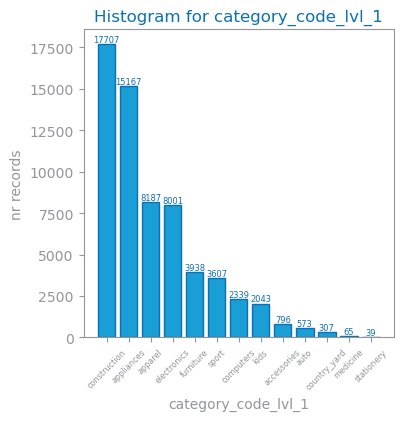

In [155]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show  # Certifique-se de que as bibliotecas necessárias estão importadas
from pandas import Series  # Importando Series para a tipagem

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'brand'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'brand' existe na lista de variáveis simbólicas
if "category_code_lvl_1" in symbolic:
    counts: Series = df["category_code_lvl_1"].value_counts()  # Conta os valores para a variável 'brand'

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)

    # Plota o histograma para 'brand'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for category_code_lvl_1",
        xlabel="category_code_lvl_1",
        ylabel="nr records",
        percentage=False,
    )
    
    # Exibe o gráfico
    show()
else:
    print("A variável 'category_code_level_1' não existe entre as variáveis simbólicas.")


##### var category_code_lvl_2  ?? To many values

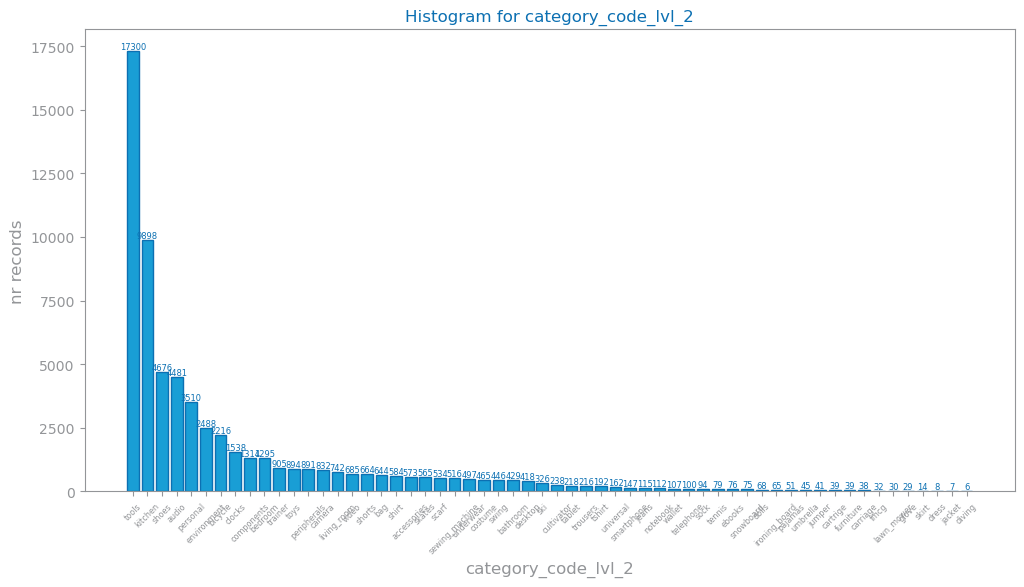

In [158]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show
from pandas import Series

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'category_code_lvl_2'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'category_code_lvl_2' existe na lista de variáveis simbólicas
if "category_code_lvl_2" in symbolic:
    counts: Series = df["category_code_lvl_2"].value_counts()  # Conta os valores para a variável

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(12, 6), squeeze=False)  # Aumentar o tamanho do gráfico

    # Plota o histograma para 'category_code_lvl_2'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for category_code_lvl_2",
        xlabel="category_code_lvl_2",
        ylabel="nr records",
        percentage=False,
    )

    # Rotaciona os rótulos do eixo x para melhor legibilidade
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotacionar os rótulos

    # Ajustar o tamanho da fonte
    axs[0, 0].set_xlabel("category_code_lvl_2", fontsize=12)  # Aumentar tamanho da fonte
    axs[0, 0].set_ylabel("nr records", fontsize=12)

    # Exibe o gráfico
    show()
else:
    print("A variável 'category_code_lvl_2' não existe entre as variáveis simbólicas.")


##### var category_code_lvl_3  ?? To many values

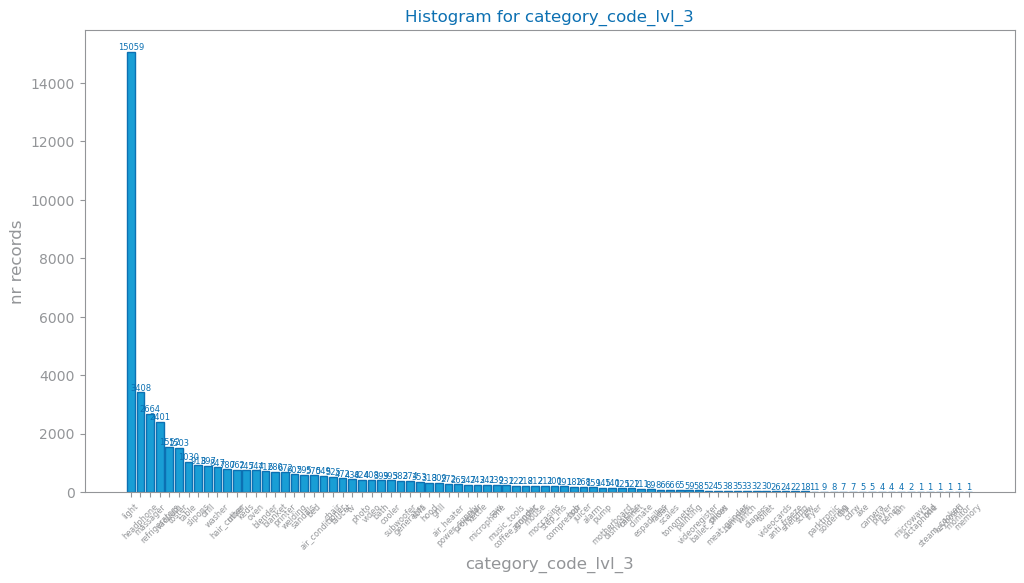

In [159]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show
from pandas import Series

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'category_code_lvl_2'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'category_code_lvl_2' existe na lista de variáveis simbólicas
if "category_code_lvl_3" in symbolic:
    counts: Series = df["category_code_lvl_3"].value_counts()  # Conta os valores para a variável

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(12, 6), squeeze=False)  # Aumentar o tamanho do gráfico

    # Plota o histograma para 'category_code_lvl_2'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for category_code_lvl_3",
        xlabel="category_code_lvl_3",
        ylabel="nr records",
        percentage=False,
    )

    # Rotaciona os rótulos do eixo x para melhor legibilidade
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotacionar os rótulos

    # Ajustar o tamanho da fonte
    axs[0, 0].set_xlabel("category_code_lvl_3", fontsize=12)  # Aumentar tamanho da fonte
    axs[0, 0].set_ylabel("nr records", fontsize=12)

    # Exibe o gráfico
    show()
else:
    print("A variável 'category_code_lvl_2' não existe entre as variáveis simbólicas.")

### Balancing and Class distribution


conversion
not_purchase    68443
purchase         1441
Name: count, dtype: int64


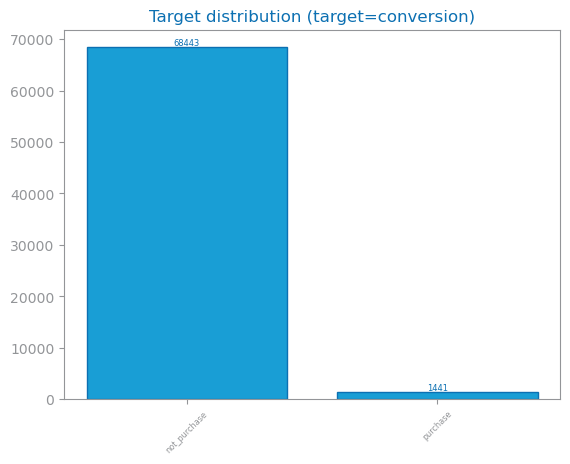

In [185]:
from matplotlib.pyplot import savefig, show
target = "conversion"

values: Series = df[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

In [91]:
df.shape[0]

69884

## Granularity

In [53]:
def derive_date_variables(df: DataFrame, date_vars: list[str]) -> DataFrame:
    for date in date_vars:
        df[date + "_year"] = df[date].dt.year
        df[date + "_quarter"] = df[date].dt.quarter
        df[date + "_month"] = df[date].dt.month
        df[date + "_day"] = df[date].dt.day
    return df

In [54]:
print(df.dtypes)


event_time             datetime64[ns, UTC]
event_type                        category
brand                             category
price                              float64
category_code_lvl_1               category
category_code_lvl_2               category
category_code_lvl_3               category
conversion                          object
dtype: object


In [55]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        try:
            if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
                variable_types["binary"].append(c)
            elif df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                # Tenta converter para numérico
                df[c] = to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
        except (ValueError, TypeError):
            try:
                # Tenta converter para datetime
                df[c] = to_datetime(df[c], errors="raise")
                variable_types["date"].append(c)
            except (ValueError, TypeError):
                variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)


{'numeric': ['price'], 'binary': ['conversion'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3']}


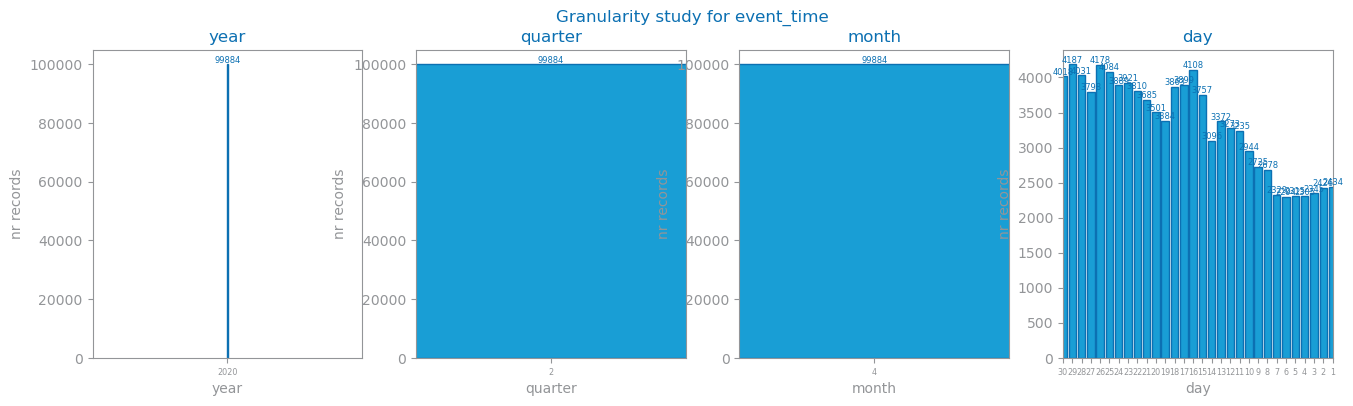

In [56]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
from dslabs_functions import plot_bar_chart, HEIGHT


def analyse_date_granularity(data: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = data[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs

variables_types: dict[str, list] = get_variable_types(df)
data_ext: DataFrame = derive_date_variables(df, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(df, v_date, ["year", "quarter", "month", "day"])
    #savefig(f"images/{file_tag}_granularity_{v_date}.png")
    show()

In [92]:
# Verifica se a coluna 'event_time' é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Cria uma nova coluna para armazenar a data sem a hora
    df['event_date'] = df['event_time'].dt.date

    # Conta o número de dias únicos
    num_unique_days = df['event_date'].nunique()

    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")


Número de dias únicos: 30


## Sparsity

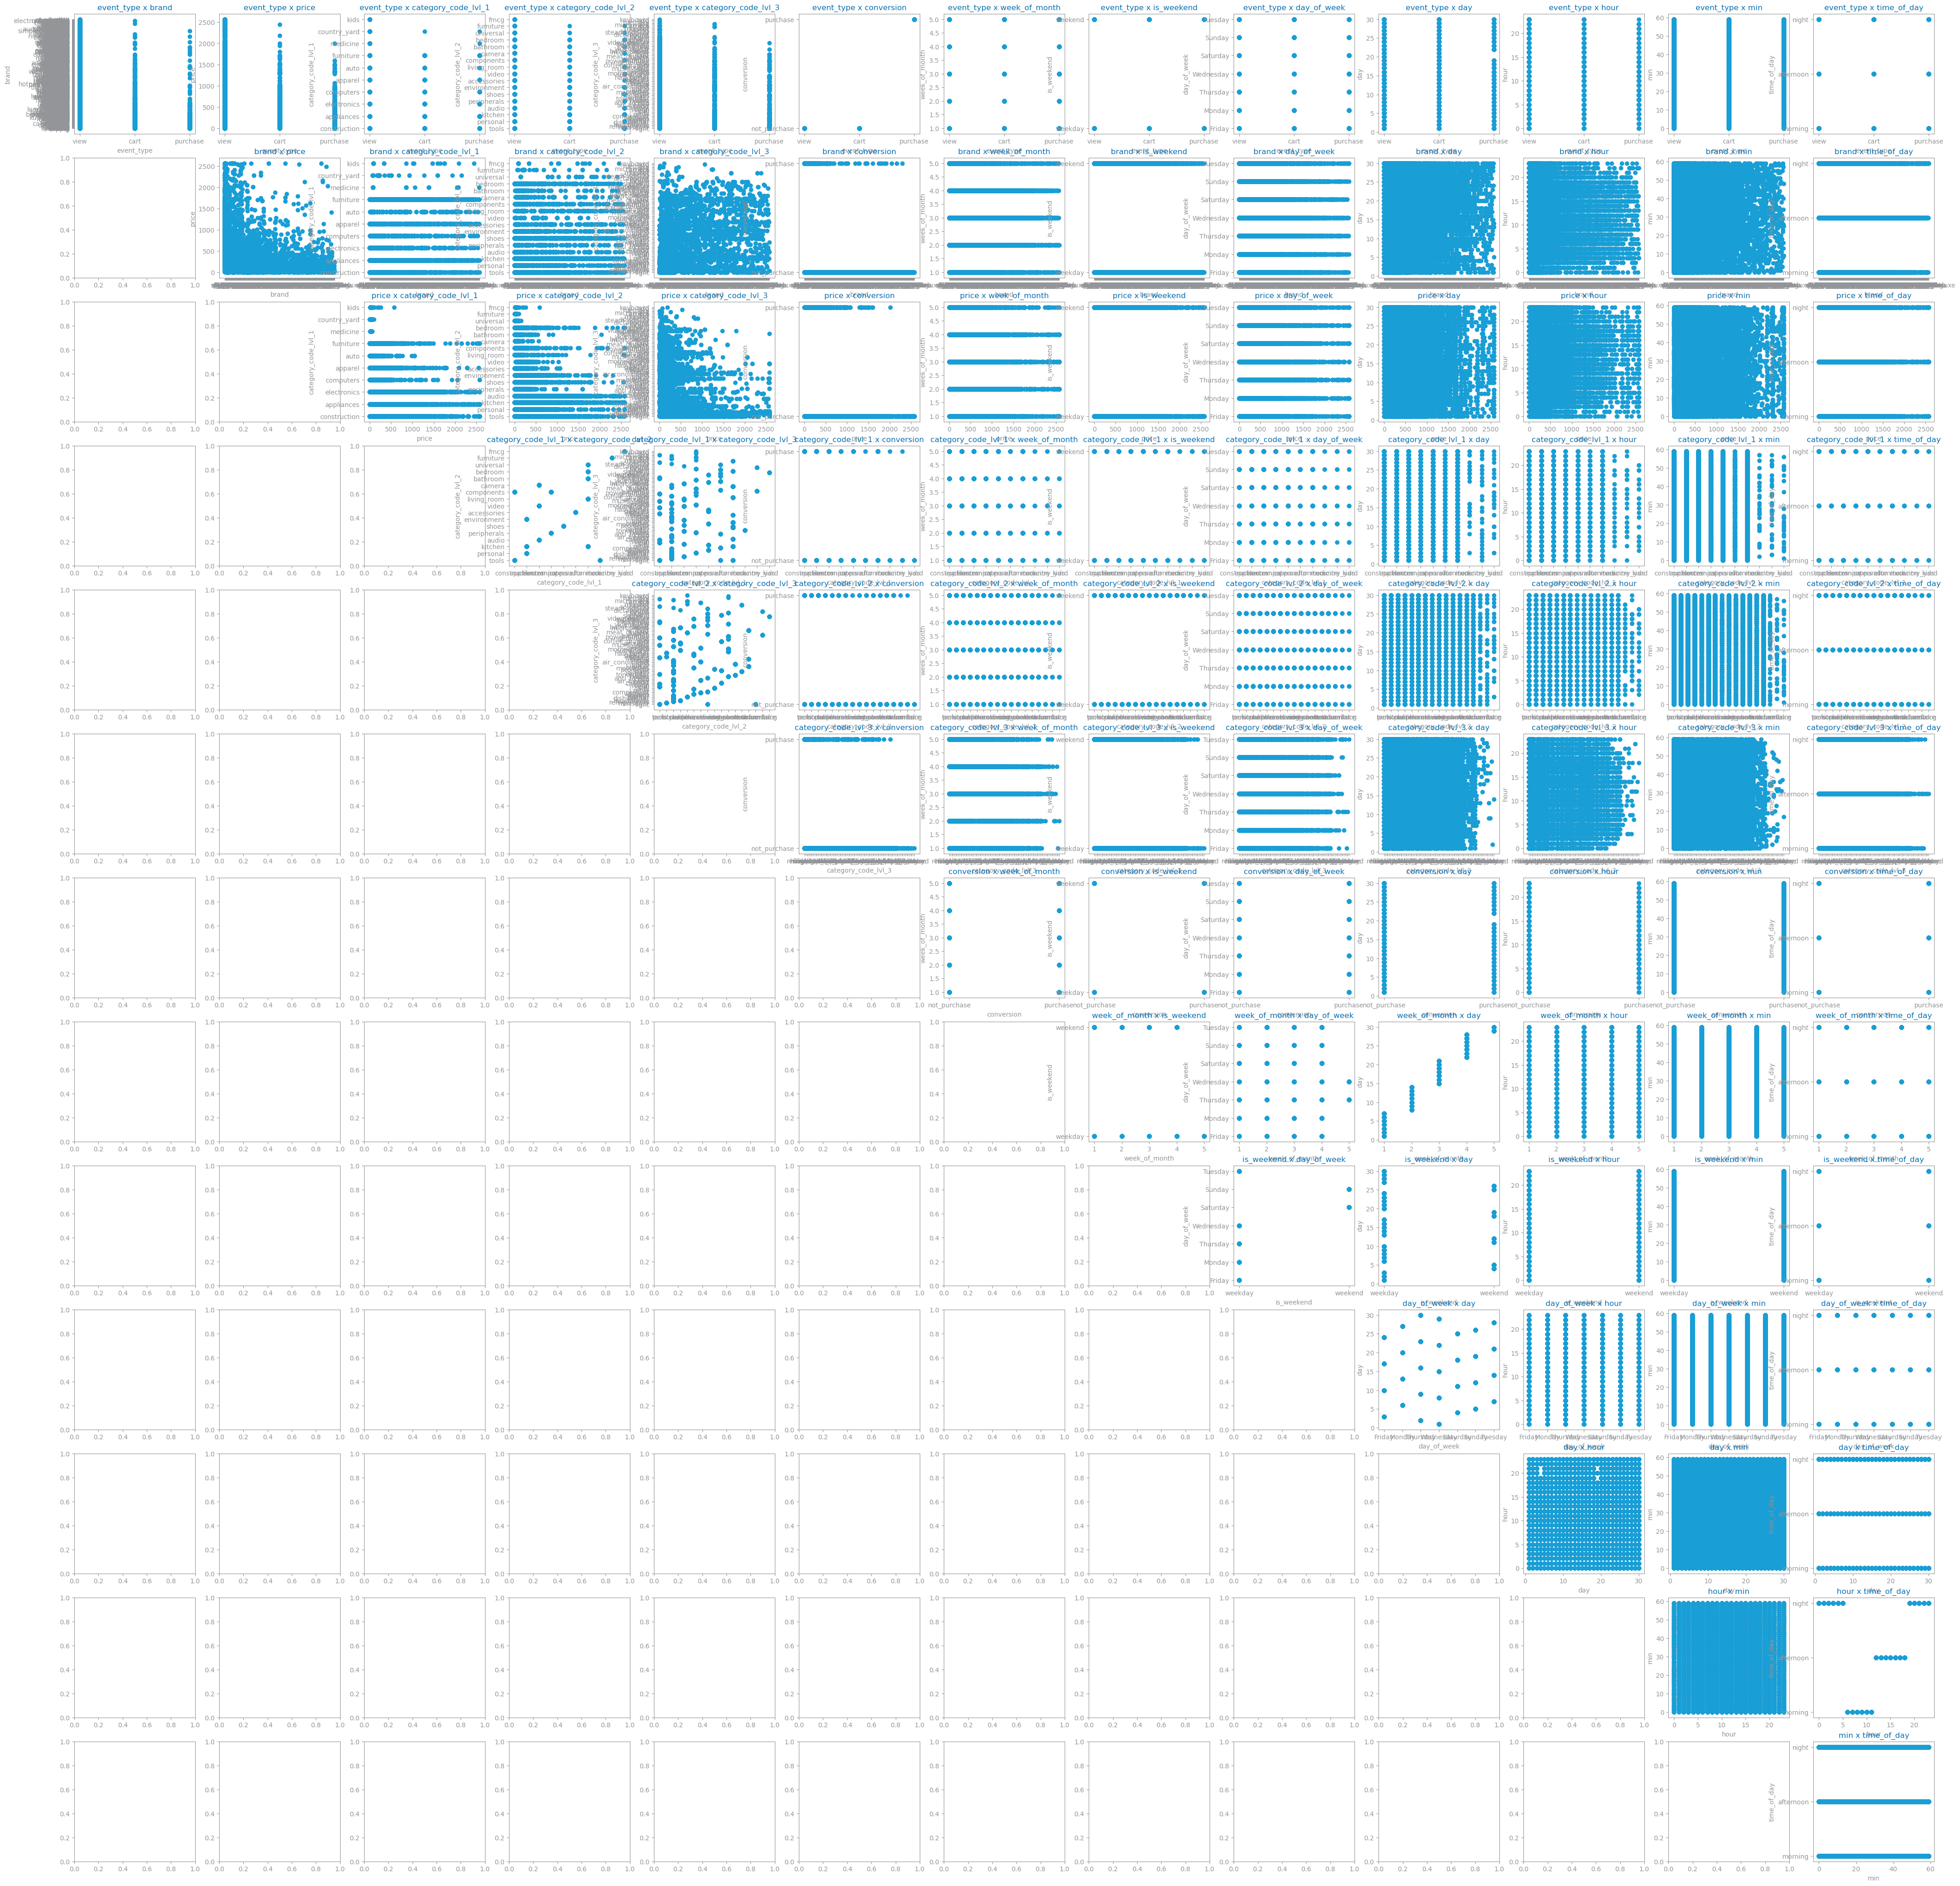

In [165]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart


df = df.dropna()

vars: list = df.columns.to_list()
if [] != vars:
    target = "stroke"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(df, var1, var2, ax=axs[i, j - 1])
    #savefig(f"images/{file_tag}_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")

## Insights

# Remove columns that we identified as not needed in the data profiling analysis

## Col min 
- Why we don't need this column

In [ ]:
#drop id columns that are not relevant for the prediction of the class

#df = df.drop(columns=['min'])

#df.head(20)

# Save final df from Data profiling into a csv file
- We will use this dataset for the next phase - data preparation

In [186]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_profiling.csv'

# Salvar o DataFrame em CSV
df.to_csv(filepath, index=False)

In [111]:
df.shape[0]

69884

In [187]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
event_type                 3
brand                   2044
price                  13363
category_code_lvl_1       13
category_code_lvl_2       58
category_code_lvl_3       84
conversion                 2
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                3
dtype: int64
